In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.sparse

# 1) Initialisation

In [2]:
# Paramètres
L = 1
x0 = 0.5
m = 50
x = np.linspace(0,L,m)
# C = 0.8
a = 1
T = 1

In [3]:
def init2(x0,x): #Fonction pour créer u0 signal carré
    u0 = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] < x0:
            u0[i] = 0
        else:
            u0[i] = 1
    return u0

In [4]:
U02 = init2(x0, x)

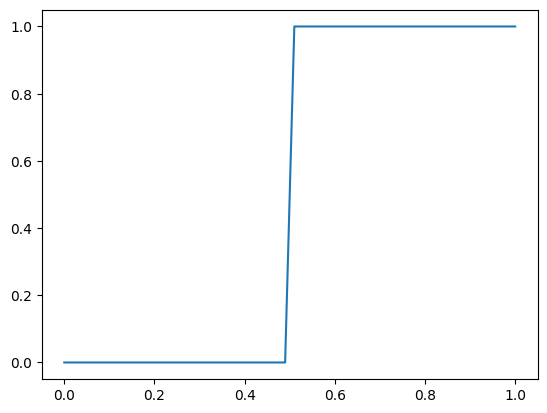

In [5]:
plt.plot(x, U02) # affichage du signal carré

# 2) Schéma

##  Beam-Warming

In [6]:
def BW(u0, C, m, psy):
    u = np.zeros(m)
    r = np.zeros(m)
    Psy = np.zeros(m)
    r[0] = (u0[1]-u0[0])/max(abs(u0[0]-u0[-1]),1e-9)*np.sign(u0[0]-u0[-1])
    r[1] = (u0[2]-u0[1])/max(abs(u0[1]-u0[0]),1e-9)*np.sign(u0[1]-u0[0])
    r[m-1] = (u0[0]-u0[m-1])/max(abs(u0[m-1]-u0[m-2]),1e-9)*np.sign(u0[m-1]-u0[m-2])

    for i in range(m-3):
        r[2+i] = (u0[3+i]-u0[2+i])/max(abs(u0[2+i]-u0[1+i]), 1e-9)*np.sign(u0[2+i]-u0[1+i])

    for i in range(m):
        Psy[i] = psy(r[i])

    
    u[0] = u0[0] - C*(u0[0]-u0[-1]) - C/2*(1-C)*Psy[0]*(u0[0]-u0[-1]) + C/2*(1-C)*Psy[-1]*(u0[-1] - u0[-2])
    u[1] = u0[1] - C*(u0[1]-u0[0]) - C/2*(1-C)*Psy[1]*(u0[1]-u0[0]) + C/2*(1-C)*Psy[0]*(u0[0] - u0[-1])
    u[m-1] = u0[m-1] - C*(u0[m-1]-u0[m-2]) - (C/2)*(1-C)*Psy[m-1]*(u0[m-1]-u0[m-2]) + C/2*(1-C)*Psy[m-2]*(u0[m-2] - u0[m-3])
    u[2:m-1] = u0[2:m-1] - C*(u0[2:m-1]-u0[1:m-2]) - C/2*(1-C)*Psy[2:m-1]*(u0[2:m-1]-u0[1:m-2]) + C/2*(1-C)*Psy[1:m-2]*(u0[1:m-2] - u0[0:m-3])

    return u

## Lax-Wendroff

In [7]:
def LW(u0, C, m, psy):
    u = np.zeros(m)
    r = np.zeros(m)
    Psy = np.zeros(m)
    r[0] = (u0[0]-u0[-1])/max(abs(u0[1]-u0[0]),1e-9)*np.sign(u0[1]-u0[0])
    r[1] = (u0[1]-u0[0])/max(abs(u0[2]-u0[1]),1e-9)*np.sign(u0[2]-u0[1])
    r[m-1] = (u0[m-1]-u0[m-2])/max(abs(u0[0]-u0[m-1]),1e-9)*np.sign(u0[0]-u0[m-1])

    for i in range(m-3):
        r[2+i] = (u0[2+i]-u0[1+i])/max(abs(u0[3+i]-u0[2+i]), 1e-9)*np.sign(u0[3+i]-u0[2+i])

    for i in range(m):
        Psy[i] = psy(r[i])

    u[0] = u0[0] - C*(u0[0]-u0[-1]) - C/2*(1-C)*Psy[0]*(u0[1]-u0[0]) + C/2*(1-C)*Psy[-1]*(u0[0] - u0[-1])
    u[1] = u0[1] - C*(u0[1]-u0[0]) - C/2*(1-C)*Psy[1]*(u0[2]-u0[1]) + C/2*(1-C)*Psy[0]*(u0[1] - u0[0])
    u[m-1] = u0[m-1] - C*(u0[m-1]-u0[m-2]) - (C/2)*(1-C)*Psy[m-1]*(u0[0]-u0[m-1]) + C/2*(1-C)*Psy[m-2]*(u0[m-1] - u0[m-2])
    u[2:m-1] = u0[2:m-1] - C*(u0[2:m-1]-u0[1:m-2]) - C/2*(1-C)*Psy[2:m-1]*(u0[3:m]-u0[2:m-1]) + C/2*(1-C)*Psy[1:m-2]*(u0[2:m-1] - u0[1:m-2])
 
    return u

# 3) Fonctions visualisation + TV

In [8]:
def visu_bw(C, lim, affiche_tv = False):
    time = 0.0
    U1_bw = BW(U02, C, m, lim)
    tv = [TV(U1_bw)]
    dt = C/(m*a)
    while time < T:
        U1_bw = BW(U1_bw, C, m, lim)
        tv.append(TV(U1_bw))
        time = time + dt
    if affiche_tv:
        plt.plot(tv, label = f'{lim.__name__}')
        plt.legend()
    else:
        plt.plot(x, U02, label = "Signal initial")
        plt.plot(x, U1_bw, label = "Solution")
        plt.legend()
        plt.title("Methode BW, C = " + str(C) + ', method : ' + f'{lim.__name__}')

In [9]:
def visu_lw(C, lim, affiche_tv = False):
    time = 0.0
    U1_bw = LW(U02, C, m, lim)
    tv = [TV(U1_bw)]
    dt = C/(m*a)
    while time < T:
        U1_bw = LW(U1_bw, C, m, lim)
        tv.append(TV(U1_bw))
        time = time + dt
    if affiche_tv:
        plt.plot(tv, label =  f'{lim.__name__}')
        plt.legend()
    else:
        plt.plot(x, U02, label = "Signal initial")
        plt.plot(x, U1_bw, label = "Solution")
        plt.legend()
        plt.title("Methode LW, C = " + str(C) + ', method : ' + f'{lim.__name__}')

In [10]:
def TV(u):
    tv = 0
    for i in range(len(u)-1):
        tv = tv + abs(u[(i+1)%len(u)] - u[i])
    tv = tv + abs(u[0] - u[-1])
    return tv

# 4) Limiteurs

## Sans limiteur

In [11]:
def no_lim(r):
    return 1

## Min_mod

In [12]:
def min_mod(r):
    if r < 0:
        return 0
    else:
        return min(r, 1)

## Superbee

In [13]:
def superbee(r):
    return max(0, min(2*r,1), min(r,2))

## Van-Leer

In [14]:
def Van_Leer(r):
    return (r+abs(r))/(1+r)

## Van-Albada

In [15]:
def Van_Albada(r):
    return (r**2 + r)/(r**2 + 1)

# 5) Effet des limiteurs

## Sans limiteur

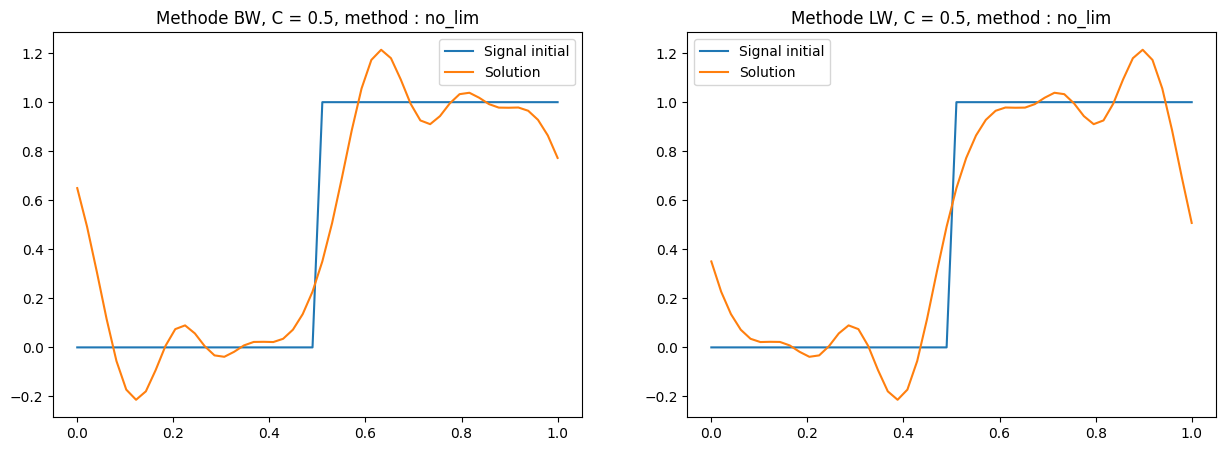

In [16]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
visu_bw(0.5, no_lim)
plt.subplot(1,2,2)
visu_lw(0.5, no_lim)

**Remarque :** Pour ne pas avoir l'effet des limiteurs, il faut mettre phi = 1 pour tout r. On remarque qu'on a bien des solutions avec dépassement.

## Min-Mod

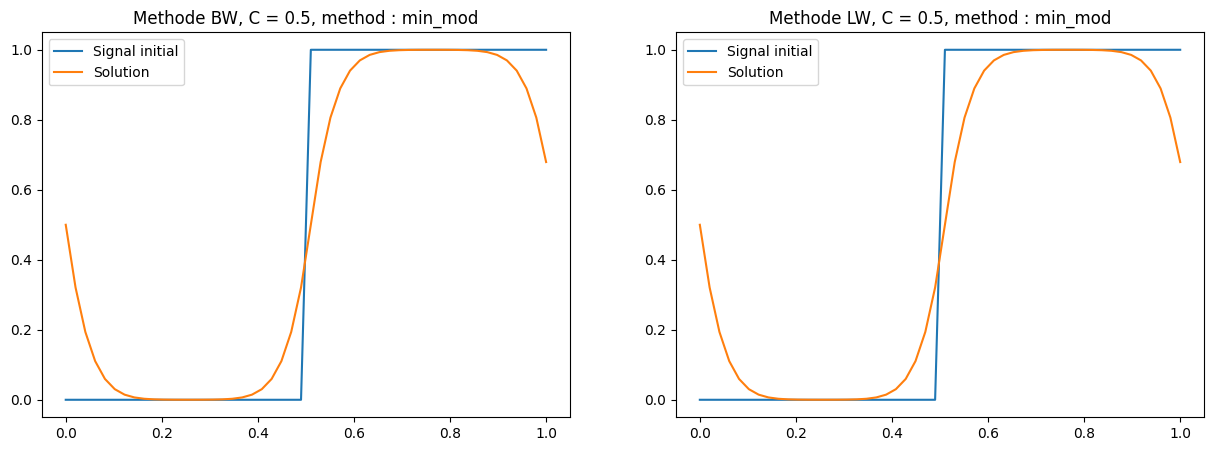

In [129]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
visu_bw(0.5, min_mod)
plt.subplot(1,2,2)
visu_lw(0.5, min_mod)

**Remarque :** Le limiteur min_mod a le même effet que ce soit avec le schéma BW ou LW. Le resultat est assez lisse et courbe et il n'y a plus de dépassement. Cependant dans les angles, on ne s'approche pas vraiment du créneau.

## Superbee

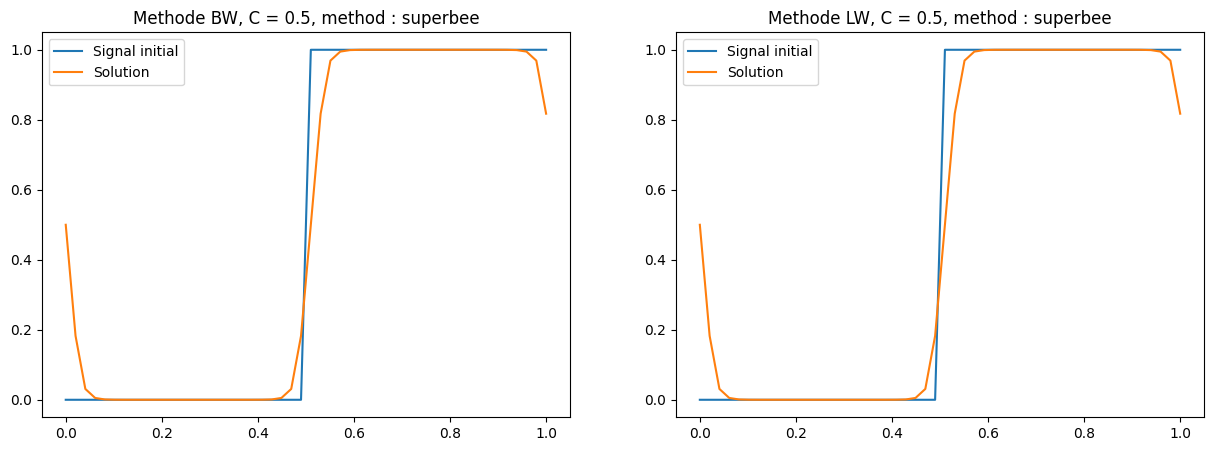

In [130]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
visu_bw(0.5, superbee)
plt.subplot(1,2,2)
visu_lw(0.5, superbee)

**Remarque :** Le limiteur Superbee nous donne une solution très satisfaisante. Il n'y a plus de dépassement et on s'approche bien du créneau même dans les angles.

## Van-Leer

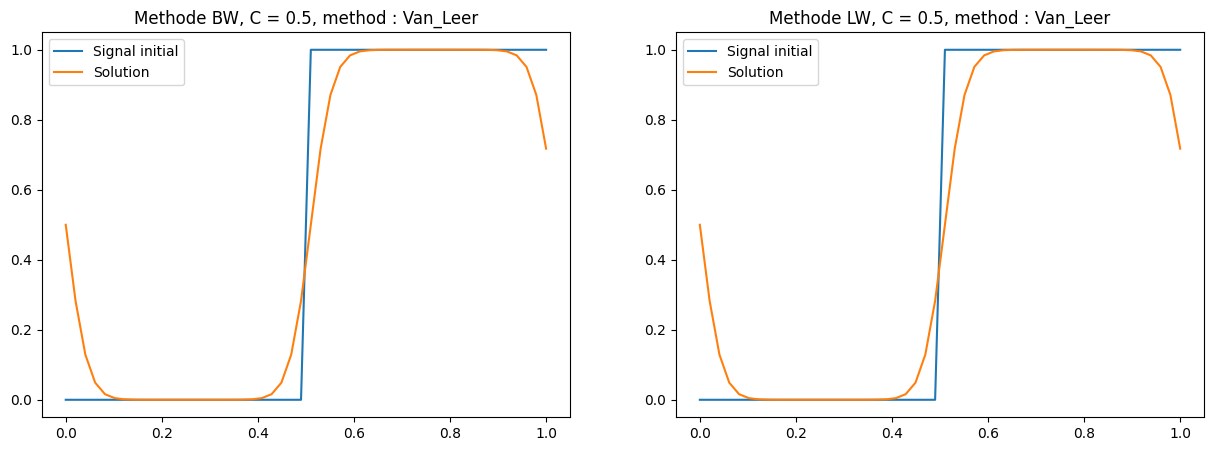

In [131]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
visu_bw(0.5, Van_Leer)
plt.subplot(1,2,2)
visu_lw(0.5, Van_Leer)

**Remarque :** Ce limiteur est précis mais pas autant que Superbee, il s'approche moins bien des angles mais ça reste satisfaisant.

## Van-Albada

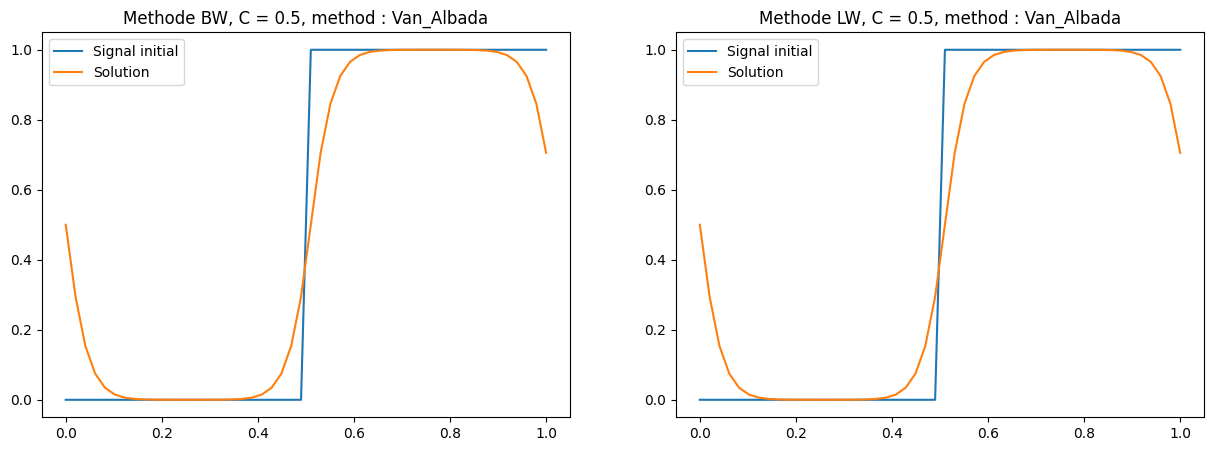

In [132]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
visu_bw(0.5, Van_Albada)
plt.subplot(1,2,2)
visu_lw(0.5, Van_Albada)

**Remarque :** Ce limiteur est similaire au précédent en terme d'interprétation.

# 6) Evolution temporelle de la variation TV

Text(0.5, 1.0, 'TV schéma LW, C = 0.5')

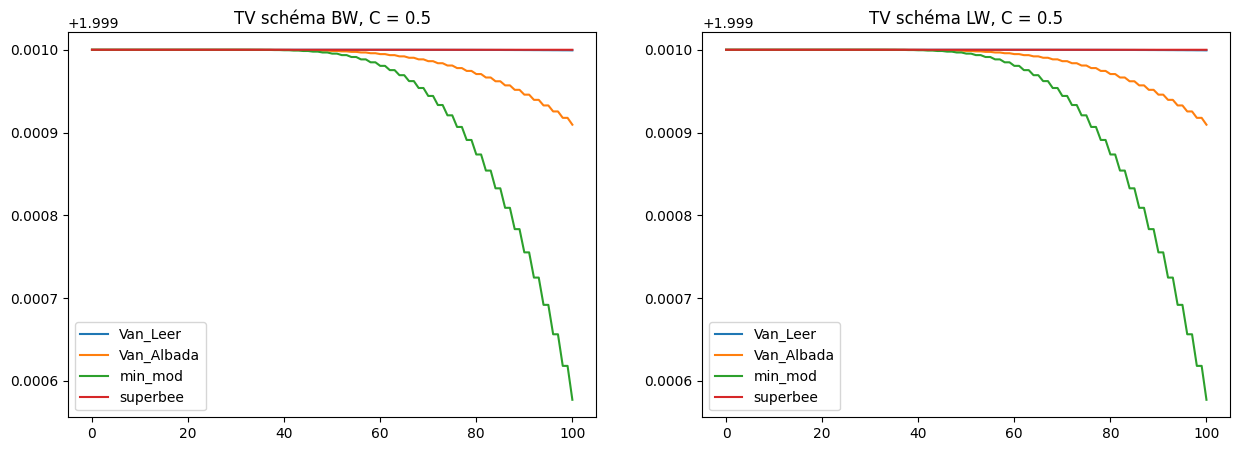

In [137]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
visu_bw(0.5, Van_Leer, True)
visu_bw(0.5, Van_Albada, True)
visu_bw(0.5, min_mod, True)
visu_bw(0.5, superbee, True)
plt.title("TV schéma BW, C = 0.5")
plt.subplot(1,2,2)
visu_lw(0.5, Van_Leer, True)
visu_lw(0.5, Van_Albada, True)
visu_lw(0.5, min_mod, True)
visu_lw(0.5, superbee, True)
plt.title("TV schéma LW, C = 0.5")

**Remarque :** On affiche la différence TV pour identifier le meilleur limiteur. On observe que parmis les 4 limiteurs, deux sont plus efficaces que les autres. En effet superbee et Van-Leer approximent mieux notre signal carré.

Text(0.5, 1.0, 'TV schéma LW, C = 0.5')

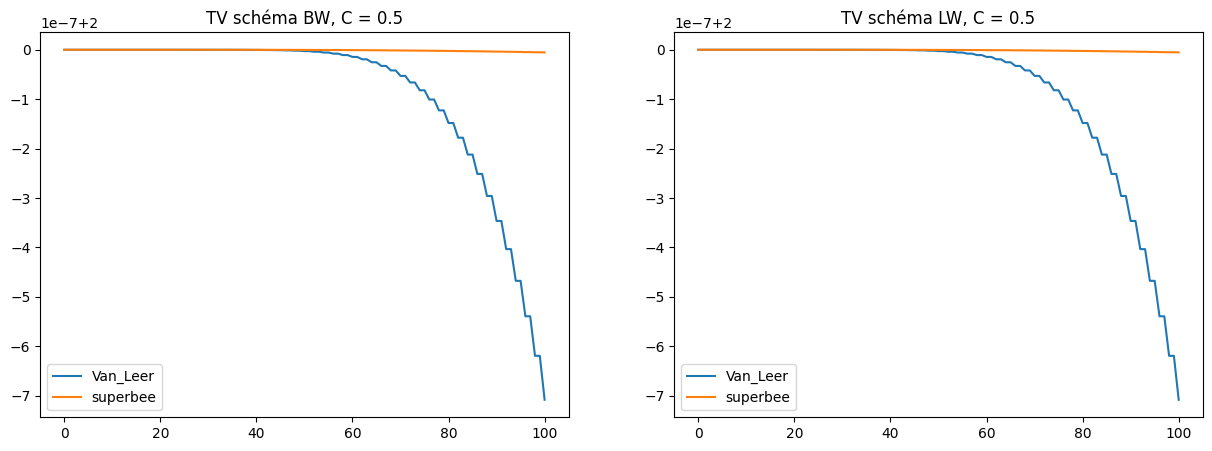

In [138]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
visu_bw(0.5, Van_Leer, True)
visu_bw(0.5, superbee, True)
plt.title("TV schéma BW, C = 0.5")
plt.subplot(1,2,2)
visu_lw(0.5, Van_Leer, True)
visu_lw(0.5, superbee, True)
plt.title("TV schéma LW, C = 0.5")

**Remarque :** Lorsqu'on affiche seulement Van-Leer et Superbee, on observe que Superbee est bien meilleur comme on a pu le constater avec les premiers graphiques. On a très peu de différence avec ce limiteur dans le cas d'un signal carré.
